<a href="https://colab.research.google.com/github/LuisChDev/BigData_Colab/blob/master/renfe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Descriptivo 
Luis Chavarriaga, Roque del Rio

#### Imports, Preparación de datos  
---
#### Imports y Librerías 

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# google colab solamente

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### Leer data


In [ ]:
dtypes = {'origin': 'str', 'destination': 'str', 'train_type': 'str', 'price': 'float'}
parse_dates = ['start_date', 'end_date']
dataSample = pd.read_csv('/content/drive/My Drive/high_speed_spanish_trains.csv',dtype=dtypes, parse_dates=parse_dates)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##### Reducir size del dataFrame

In [ ]:
dataSample = dataSample.sample(frac=0.30, random_state=99) 

#### Adquirir información y ejemplo de la data 

In [ ]:
dataSample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8128053 entries, 21375198 to 8624228
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   insert_date  object        
 1   origin       object        
 2   destination  object        
 3   start_date   datetime64[ns]
 4   end_date     datetime64[ns]
 5   train_type   object        
 6   price        float64       
 7   train_class  object        
 8   fare         object        
 9   price_tree   object        
 10  batch        object        
 11  id           float64       
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 806.2+ MB


In [ ]:
dataSample.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,price_tree,batch,id
21375198,2020-03-12 18:34:15,ALICANTE,MADRID,2020-05-10 20:10:00,2020-05-10 22:47:00,AVE,55.7,Turista,Promo +,"{""Turista"": {""Promo +"": {""price"": 55.7, ""seats...",2020-03-12 16:30:00,10564590.0
27049297,2020-03-30 12:35:57,VALENCIA,MADRID,2020-05-03 18:10:00,2020-05-03 19:57:00,AVE,NaN,NaN,NaN,{},2020-03-30 10:30:00,16296868.0
17289332,2020-02-21 06:32:22,MADRID,SEVILLA,2020-02-28 17:00:00,2020-02-28 19:38:00,AVE,NaN,NaN,NaN,{},2020-02-21 04:01:33.517092,6543671.0
2495366,2019-06-13 13:40:42,VALENCIA,MADRID,2019-08-02 10:40:00,2019-08-02 13:05:00,INTERCITY,25.5,Turista,Promo,NaN,NaN,NaN
15264812,2020-02-27 10:14:15,ALBACETE,MADRID,2020-03-11 07:07:00,2020-03-11 08:45:00,AVE,28.2,Turista,Promo,"{""Turista"": {""Promo"": {""price"": 28.2, ""seats"":...",2020-02-27 06:00:00,4519151.0


##### Convertir datos a formato datetime, normalizar filas con valores nulos
 
- Los valores nulos se reemplazan con None.

In [ ]:
dataSample['price_tree'] = dataSample['price_tree'].fillna(0.0)
dataSample['price'] = dataSample['price'].fillna(0.0)
dataSample['id'] = dataSample['id'].fillna(0.0)
dataSample['train_class'] = dataSample['train_class'].fillna('None')
dataSample['fare'] = dataSample['fare'].fillna('None')
dataSample['batch'] = dataSample['batch'].fillna('None')

# dataSample.dropna(axis=0,subset=['price'],inplace=True)
# dataSample.dropna(axis=0,inplace=True)


##### Comprobar si se han reemplazado correctamente los valores NaN

Posteriormente se verifica si existen valores nulos en la data

In [ ]:
#dataSample.to_string(columns = ['origin', 'destination']) # no necesario, pandas guarda STRING como object
    
dataSample.info()

dataSample.isnull().any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8128053 entries, 21375198 to 8624228
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   insert_date  object        
 1   origin       object        
 2   destination  object        
 3   start_date   datetime64[ns]
 4   end_date     datetime64[ns]
 5   train_type   object        
 6   price        float64       
 7   train_class  object        
 8   fare         object        
 9   price_tree   object        
 10  batch        object        
 11  id           float64       
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 806.2+ MB


insert_date    False
origin         False
destination    False
start_date     False
end_date       False
train_type     False
price          False
train_class    False
fare           False
price_tree     False
batch          False
id             False
dtype: bool

##### Extraer datos del data frame

In [ ]:
dataSample['start_year'] = dataSample['start_date'].dt.year
dataSample['start_month'] = dataSample['start_date'].dt.month
dataSample['start_day'] = dataSample['start_date'].dt.day
dataSample['start_hour'] = dataSample['start_date'].dt.hour

dataSample['travel_time'] = dataSample['end_date'] - dataSample['start_date']
dataSample['travel_time'] = dataSample['travel_time'].dt.total_seconds().div(60).astype(int)
dataSample['route'] = dataSample['origin'].astype(str) + " " + dataSample['destination'].astype(str)

In [ ]:
dataSample.sample()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,price_tree,batch,id,start_year,start_month,start_day,start_hour,travel_time,route
15713961,2020-02-29 03:15:08,MADRID,BARCELONA,2020-03-02 20:30:00,2020-03-02 23:40:00,AVE,69.75,Preferente,Promo,"{""Turista"": {""Promo"": {""price"": 76.25, ""seats""...",2020-02-28 21:00:00,4968300.0,2020,3,2,20,190,MADRID BARCELONA


#### Analisis numerico de precios
---



In [ ]:
dataSample[{'price': ['min', 'max', 'median', 'skew']}].describe()

,price
count,8.128053e+06
mean,3.958921e+01
std,3.341381e+01
min,0.000000e+00
25%,0.000000e+00
50%,3.960000e+01
75%,6.340000e+01
max,3.428000e+02


#### Analisis de ciudades y destinos
---



##### Origin cities ("Ciudades origen")

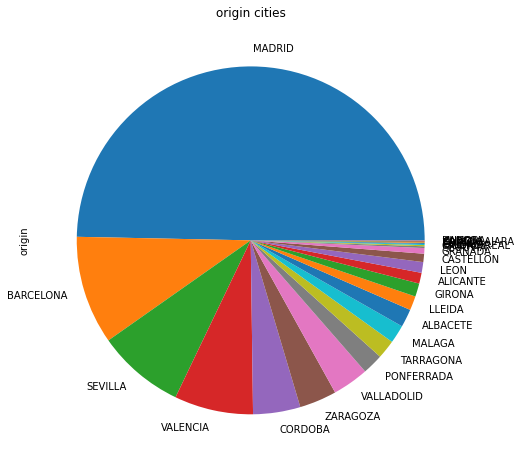

In [ ]:
dataSample['origin'].value_counts().plot(kind='pie', title = 'origin cities', figsize=(8,8))


##### Destination cities ("Ciudades destino")

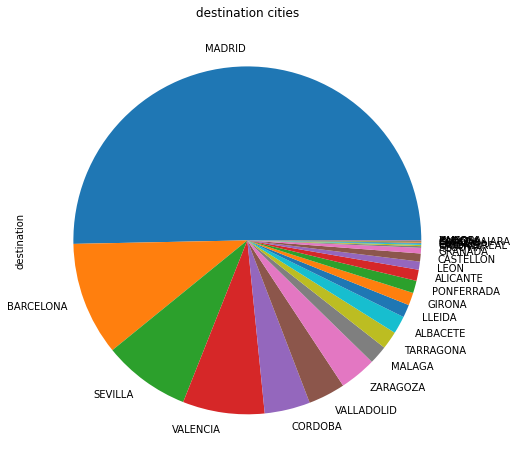

In [ ]:
dataSample['destination'].value_counts().plot(kind='pie', title = 'destination cities', figsize=(8,8))

#### Analisis temporal
---

##### Fechas de inicio y fin de viaje

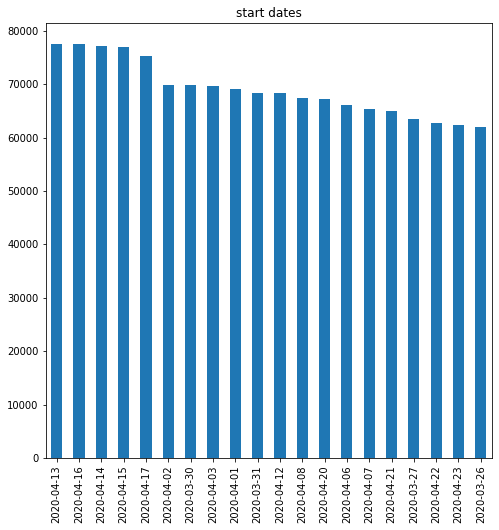

In [ ]:
stdate = dataSample['start_date'].dt.date.value_counts()
stdate = stdate[:20,] # 20 datos es suficiente para propositos demonstrativos.
stdate.plot.bar(title = 'start dates', figsize=(8,8))

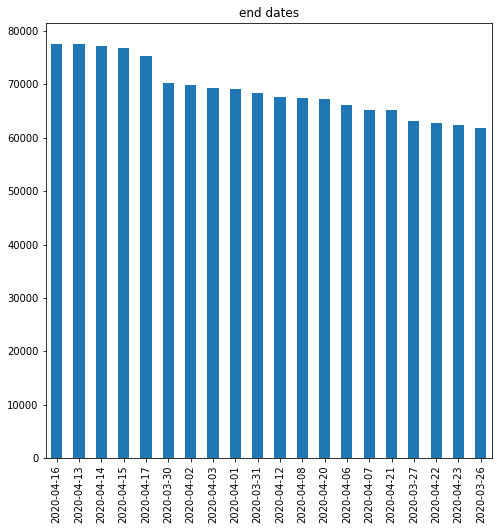

In [ ]:
stdate = dataSample['end_date'].dt.date.value_counts()
stdate = stdate[:20,]
stdate.plot.bar(title = 'end dates', figsize=(8,8))

##### Viajes por hora

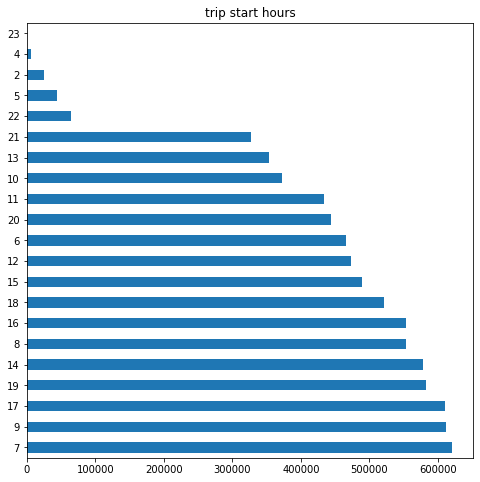

In [ ]:
stdate = dataSample['start_hour'].value_counts()

stdate.plot(kind = 'barh', title = 'trip start hours', figsize=(8,8))

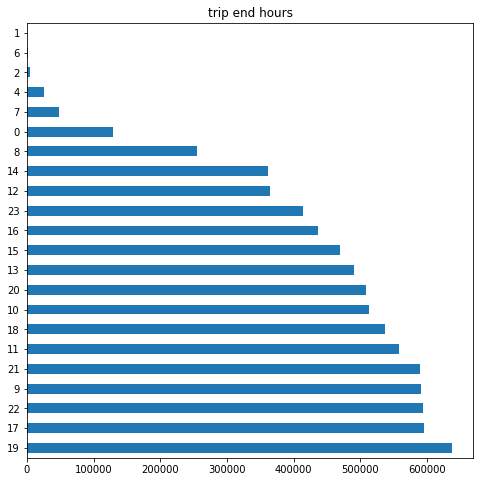

In [ ]:
stdate = dataSample['end_date'].dt.hour.value_counts()

stdate.plot(kind = 'barh', title = 'trip end hours', figsize=(8,8))

##### Viajes por mes

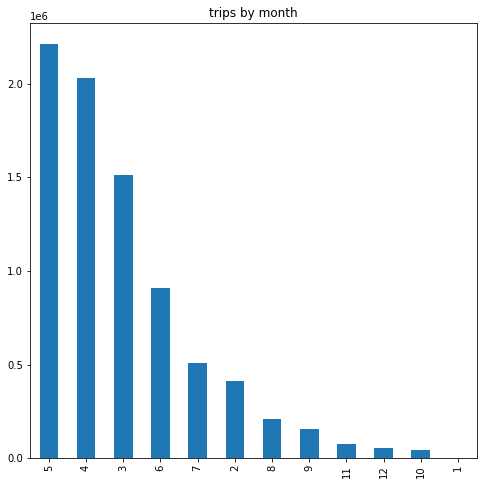

In [ ]:
stdate = dataSample['start_month'].value_counts()

stdate.plot(kind = 'bar', title = 'trips by month', figsize=(8,8))

##### Duracion promedio de viaje segun ruta

In [ ]:
dataSample.groupby('route').agg({"travel_time": "mean"})

,travel_time
route,
ALBACETE MADRID,121.440154
ALICANTE MADRID,175.473989
BARCELONA MADRID,189.489657
CADIZ MADRID,271.842506
CASTELLON MADRID,208.985767
CIUDAD REAL MADRID,67.645326
CORDOBA MADRID,113.609548
CUENCA MADRID,79.939528
GIRONA MADRID,256.604286


##### Duracion promedio de viaje segun destino

In [ ]:
dataSample.groupby('destination').agg({"travel_time": "mean"})

,travel_time
destination,
ALBACETE,114.722720
ALICANTE,174.172555
BARCELONA,189.924309
CADIZ,266.821594
CASTELLON,186.896901
CIUDAD REAL,63.533840
CORDOBA,110.842010
CUENCA,77.764190
GIRONA,240.275857


#### Análisis de tipos de tren y costos asociados
---


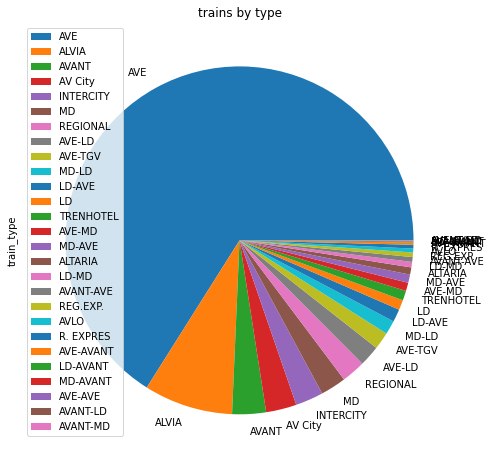

In [ ]:
sttype = dataSample['train_type'].value_counts()

sttype.plot(kind = 'pie', title = 'trains by type', legend=True, figsize=(8,8))

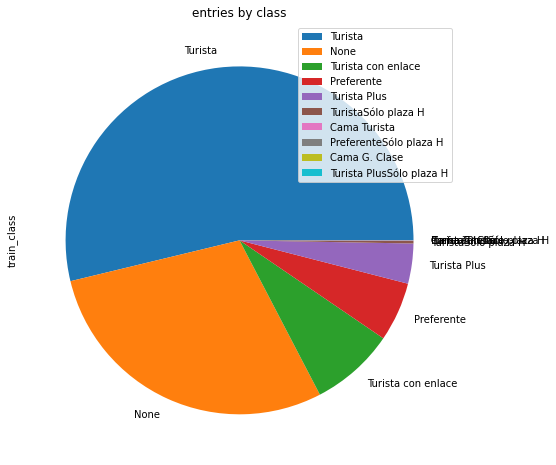

In [ ]:
sttype = dataSample['train_class'].value_counts()

sttype.plot(kind = 'pie', title = 'entries by class', legend=True, figsize=(8,8))

##### Frequencia de precio


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c01f6d320>]],
      dtype=object)

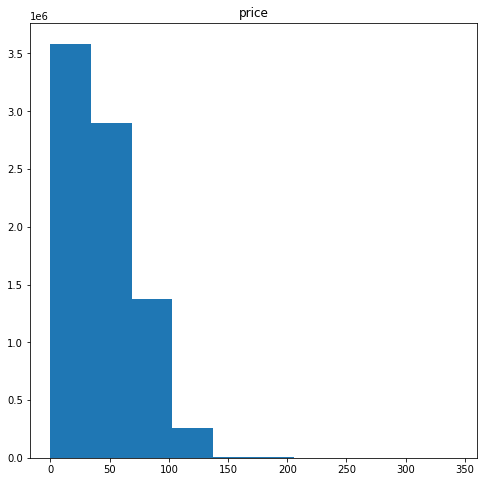

In [ ]:
dataSample.hist(column= 'price', figsize=(8,8), grid=False)

##### Precio promedio por clase

In [ ]:
dataSample.groupby('train_class').agg({"price": "mean"})

,price
train_class,
Cama G. Clase,103.320710
Cama Turista,64.846066
None,0.000000
Preferente,70.898406
PreferenteSólo plaza H,68.604075
Turista,53.476977
Turista Plus,75.214137
Turista PlusSólo plaza H,62.000000
Turista con enlace,50.115962


##### Precio promedio por destino, tarifa minima y maxima

In [ ]:
dataSample.groupby('destination').agg({"price": "mean"})

,price
destination,
ALBACETE,14.250125
ALICANTE,23.795859
BARCELONA,65.626607
CADIZ,59.054000
CASTELLON,32.256429
CIUDAD REAL,31.575727
CORDOBA,33.178394
CUENCA,24.392885
GIRONA,50.073518


In [ ]:
dataSample.groupby('destination').agg({"price": ["min", "max"]})

price       
              min    max
destination             
ALBACETE      0.0   76.6
ALICANTE      0.0  111.7
BARCELONA     0.0  342.8
CADIZ         0.0   97.7
CASTELLON     0.0  137.5
CIUDAD REAL   0.0   64.1
CORDOBA       0.0  106.8
CUENCA        0.0   59.9
GIRONA        0.0  226.4
GRANADA       0.0  136.9
GUADALAJARA   0.0   21.2
HUESCA        0.0   98.3
LEON          0.0   91.9
LLEIDA        0.0  125.8
MADRID        0.0  290.4
MALAGA        0.0  136.8
PALENCIA      0.0   60.2
PONFERRADA    0.0  150.6
SEGOVIA       0.0   32.0
SEVILLA       0.0  166.6
TARRAGONA     0.0  139.2
TOLEDO        0.0   13.9
VALENCIA      0.0  159.6
VALLADOLID    0.0   80.6
ZAMORA        0.0   53.6
ZARAGOZA      0.0   92.2

##### Precio promedio por tipo de tren


In [ ]:
dataSample.groupby('train_type').agg({"price": "mean"})

,price
train_type,
ALTARIA,20.322606
ALVIA,27.836712
AV City,29.337593
AVANT,14.097662
AVANT-AVE,81.544539
AVANT-LD,37.136368
AVANT-MD,30.042599
AVE,43.722272
AVE-AVANT,84.278745
